# 20 - Compatibility

(Problem 20) Given a set of element deformations, verify that they are compatible.

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1', 0.0, 0.0)
mdl.node('2', 0.0, 6.0)
mdl.node('3', 8.0, 6.0)
mdl.node('4', 16., 6.0)
mdl.node('5', 16., 0.0)

# elements
mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.beam('d', n['4'], n['5'])
mdl.truss('e', n['1'], n['3'])

# beam hinges
mdl.hinge(e['a'], n['1'])
mdl.hinge(e['d'], n['5'])

# Fixities
mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['5'], ['x', 'y', 'rz'])

mdl.numDOF()

[[10, 11, 12], [1, 2, 3], [4, 5, 6], [7, 8, 9], [13, 14, 15]]

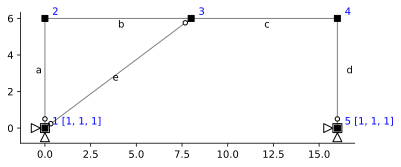

In [3]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [4]:
A = em.A_matrix(mdl)
B = em.B_matrix(mdl)
V = em.V_vector(A)

In [5]:
# V.set_item('a_2',  0.0)
# V.set_item('a_2',  0.4047e-3)
V.set_item('a_3', -0.8094e-3)
V.set_item('b_2', -1.2092e-3)
V.set_item('b_3',  4.0372e-3)
V.set_item('c_2', -2.0652e-3)
V.set_item('c_3', -2.7348e-3)
V.set_item('d_2',  3.7674e-3)
# V.set_item('d_3', -1.8837e-3)
# V.set_item('d_3',  0.0)
V.set_item('e_1',  1.9188e-3)

## Method 1: Static matrix nullspace, $\bar{B}_x$

The first method of verifying deformation compatibility is to check that the product of the given continuous element deformation vector with the the transposed nullspace of the static matrix corresponding to a selected primary structure is zero. 

To do this, first a primary structure is determined by selecting NOS redundant forces.

In [6]:
#               el     q
mdl.redundant(e['b'], '2')
mdl.redundant(e['c'], '3')

Now the `barx` method of the static matrix, `B`, will return the desired nullspace for the selected redundants.

In [7]:
B.barx

,$b_2$,$c_3$
$a_1$,-0.125000,-0.125000
$a_2$,0.000000,0.000000
$a_3$,-1.000000,0.000000
$b_1$,-0.166667,0.000000
$b_2$,1.000000,0.000000
$b_3$,-0.000000,1.000000
$c_1$,0.000000,0.166667
$c_2$,0.000000,-1.000000
$c_3$,0.000000,1.000000
$d_1$,0.000000,0.000000


In [8]:
B.barx.T@V

C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.utilities.Structural_Vector'> (expected <class 'str'>) for object: Structural_Vector([-5.e-08, -5.e-08])
  FormatterWarning


Structural_Vector([-5.e-08, -5.e-08])

In [13]:
U = A.i.inv @ V.c.i

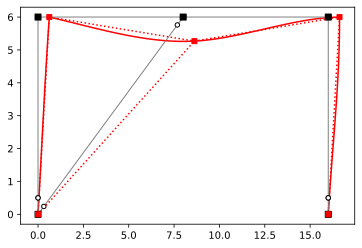

In [17]:
em.plot_U(mdl, U, ax, scale=30)